In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
#          0      1      2      3      4      5       6      7      8      9       10      11      12
coins = ['BTC', 'ETH', 'BNB', 'DOT', 'SOL', 'LUNA', 'ADA', 'CRO', 'AXS', 'SAND', 'DOGE', 'SHIB', 'MATIC']

In [3]:
coin = coins[0]
timesteps = 6

In [ ]:
import pickle
import numpy as np

with open(f's-analysis/{coin}.pkl', 'rb') as f:
    data = pickle.load(f)

EXPERIMENT_ID = data['exp_id']
X_train = data['X_train'].to_numpy()
y_train = data['y_train']
X_test = data['X_test'].to_numpy()
y_test = data['y_test']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [128]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [129]:
def time_window(input_data):
    out = []
    for i in range(len(input_data)):
        m = input_data[i : i + timesteps, :]
        if len(m) == timesteps:
            out.append(m)
    return np.array(out)

X_train = time_window(X_train)
X_test = time_window(X_test)

y_train = y_train[timesteps-1:]
y_test = y_test[timesteps-1:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(377, 6, 23) (377,) (160, 6, 23) (160,)


In [144]:
from tensorflow.keras import optimizers
    
model = Sequential()
model.add(LSTM(250, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(LSTM(32, return_sequences=True))
# model.add(LSTM(250))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer=optimizers.Adam(lr=0.00001))

history = model.fit(X_train, y_train, epochs=1000, batch_size=100, validation_data=(X_test, y_test), 
                    verbose=2, shuffle=False)

Epoch 1/1000
4/4 - 1s - loss: 3.5712 - val_loss: 4.4331
Epoch 2/1000
4/4 - 0s - loss: 3.5706 - val_loss: 4.4324
Epoch 3/1000
4/4 - 0s - loss: 3.5699 - val_loss: 4.4316
Epoch 4/1000
4/4 - 0s - loss: 3.5706 - val_loss: 4.4309
Epoch 5/1000
4/4 - 0s - loss: 3.5656 - val_loss: 4.4301
Epoch 6/1000
4/4 - 0s - loss: 3.5675 - val_loss: 4.4294
Epoch 7/1000
4/4 - 0s - loss: 3.5644 - val_loss: 4.4287
Epoch 8/1000
4/4 - 0s - loss: 3.5634 - val_loss: 4.4279
Epoch 9/1000
4/4 - 0s - loss: 3.5573 - val_loss: 4.4272
Epoch 10/1000
4/4 - 0s - loss: 3.5596 - val_loss: 4.4264
Epoch 11/1000
4/4 - 0s - loss: 3.5544 - val_loss: 4.4257
Epoch 12/1000
4/4 - 0s - loss: 3.5639 - val_loss: 4.4249
Epoch 13/1000
4/4 - 0s - loss: 3.5613 - val_loss: 4.4242
Epoch 14/1000
4/4 - 0s - loss: 3.5621 - val_loss: 4.4234
Epoch 15/1000
4/4 - 0s - loss: 3.5576 - val_loss: 4.4227
Epoch 16/1000
4/4 - 0s - loss: 3.5531 - val_loss: 4.4219
Epoch 17/1000
4/4 - 0s - loss: 3.5473 - val_loss: 4.4211
Epoch 18/1000
4/4 - 0s - loss: 3.5513 - 

Epoch 145/1000
4/4 - 0s - loss: 3.4482 - val_loss: 4.2646
Epoch 146/1000
4/4 - 0s - loss: 3.4497 - val_loss: 4.2629
Epoch 147/1000
4/4 - 0s - loss: 3.4426 - val_loss: 4.2610
Epoch 148/1000
4/4 - 0s - loss: 3.4457 - val_loss: 4.2592
Epoch 149/1000
4/4 - 0s - loss: 3.4453 - val_loss: 4.2574
Epoch 150/1000
4/4 - 0s - loss: 3.4399 - val_loss: 4.2555
Epoch 151/1000
4/4 - 0s - loss: 3.4421 - val_loss: 4.2536
Epoch 152/1000
4/4 - 0s - loss: 3.4412 - val_loss: 4.2517
Epoch 153/1000
4/4 - 0s - loss: 3.4409 - val_loss: 4.2498
Epoch 154/1000
4/4 - 0s - loss: 3.4364 - val_loss: 4.2479
Epoch 155/1000
4/4 - 0s - loss: 3.4373 - val_loss: 4.2460
Epoch 156/1000
4/4 - 0s - loss: 3.4359 - val_loss: 4.2441
Epoch 157/1000
4/4 - 0s - loss: 3.4377 - val_loss: 4.2422
Epoch 158/1000
4/4 - 0s - loss: 3.4331 - val_loss: 4.2403
Epoch 159/1000
4/4 - 0s - loss: 3.4281 - val_loss: 4.2384
Epoch 160/1000
4/4 - 0s - loss: 3.4329 - val_loss: 4.2364
Epoch 161/1000
4/4 - 0s - loss: 3.4305 - val_loss: 4.2344
Epoch 162/1000

4/4 - 0s - loss: 3.2385 - val_loss: 3.8704
Epoch 287/1000
4/4 - 0s - loss: 3.2364 - val_loss: 3.8660
Epoch 288/1000
4/4 - 0s - loss: 3.2391 - val_loss: 3.8616
Epoch 289/1000
4/4 - 0s - loss: 3.2298 - val_loss: 3.8571
Epoch 290/1000
4/4 - 0s - loss: 3.2342 - val_loss: 3.8526
Epoch 291/1000
4/4 - 0s - loss: 3.2349 - val_loss: 3.8480
Epoch 292/1000
4/4 - 0s - loss: 3.2256 - val_loss: 3.8433
Epoch 293/1000
4/4 - 0s - loss: 3.2252 - val_loss: 3.8386
Epoch 294/1000
4/4 - 0s - loss: 3.2145 - val_loss: 3.8339
Epoch 295/1000
4/4 - 0s - loss: 3.2134 - val_loss: 3.8291
Epoch 296/1000
4/4 - 0s - loss: 3.2062 - val_loss: 3.8243
Epoch 297/1000
4/4 - 0s - loss: 3.2106 - val_loss: 3.8195
Epoch 298/1000
4/4 - 0s - loss: 3.2122 - val_loss: 3.8147
Epoch 299/1000
4/4 - 0s - loss: 3.2129 - val_loss: 3.8098
Epoch 300/1000
4/4 - 0s - loss: 3.2014 - val_loss: 3.8049
Epoch 301/1000
4/4 - 0s - loss: 3.2080 - val_loss: 3.7999
Epoch 302/1000
4/4 - 0s - loss: 3.1989 - val_loss: 3.7949
Epoch 303/1000
4/4 - 0s - los

Epoch 428/1000
4/4 - 0s - loss: 2.5753 - val_loss: 2.7799
Epoch 429/1000
4/4 - 0s - loss: 2.5613 - val_loss: 2.7687
Epoch 430/1000
4/4 - 0s - loss: 2.5637 - val_loss: 2.7583
Epoch 431/1000
4/4 - 0s - loss: 2.5479 - val_loss: 2.7481
Epoch 432/1000
4/4 - 0s - loss: 2.5411 - val_loss: 2.7380
Epoch 433/1000
4/4 - 0s - loss: 2.5215 - val_loss: 2.7279
Epoch 434/1000
4/4 - 0s - loss: 2.5249 - val_loss: 2.7173
Epoch 435/1000
4/4 - 0s - loss: 2.5108 - val_loss: 2.7066
Epoch 436/1000
4/4 - 0s - loss: 2.5042 - val_loss: 2.6957
Epoch 437/1000
4/4 - 0s - loss: 2.5080 - val_loss: 2.6846
Epoch 438/1000
4/4 - 0s - loss: 2.4947 - val_loss: 2.6734
Epoch 439/1000
4/4 - 0s - loss: 2.4860 - val_loss: 2.6629
Epoch 440/1000
4/4 - 0s - loss: 2.4581 - val_loss: 2.6522
Epoch 441/1000
4/4 - 0s - loss: 2.4525 - val_loss: 2.6414
Epoch 442/1000
4/4 - 0s - loss: 2.4537 - val_loss: 2.6306
Epoch 443/1000
4/4 - 0s - loss: 2.4312 - val_loss: 2.6199
Epoch 444/1000
4/4 - 0s - loss: 2.4293 - val_loss: 2.6093
Epoch 445/1000

4/4 - 0s - loss: 1.5369 - val_loss: 2.2283
Epoch 570/1000
4/4 - 0s - loss: 1.5322 - val_loss: 2.2304
Epoch 571/1000
4/4 - 0s - loss: 1.5399 - val_loss: 2.2313
Epoch 572/1000
4/4 - 0s - loss: 1.5394 - val_loss: 2.2311
Epoch 573/1000
4/4 - 0s - loss: 1.5547 - val_loss: 2.2307
Epoch 574/1000
4/4 - 0s - loss: 1.5166 - val_loss: 2.2306
Epoch 575/1000
4/4 - 0s - loss: 1.5340 - val_loss: 2.2320
Epoch 576/1000
4/4 - 0s - loss: 1.5285 - val_loss: 2.2340
Epoch 577/1000
4/4 - 0s - loss: 1.5235 - val_loss: 2.2370
Epoch 578/1000
4/4 - 0s - loss: 1.5155 - val_loss: 2.2400
Epoch 579/1000
4/4 - 0s - loss: 1.5333 - val_loss: 2.2419
Epoch 580/1000
4/4 - 0s - loss: 1.5174 - val_loss: 2.2437
Epoch 581/1000
4/4 - 0s - loss: 1.5296 - val_loss: 2.2442
Epoch 582/1000
4/4 - 0s - loss: 1.5049 - val_loss: 2.2435
Epoch 583/1000
4/4 - 0s - loss: 1.5196 - val_loss: 2.2438
Epoch 584/1000
4/4 - 0s - loss: 1.5170 - val_loss: 2.2446
Epoch 585/1000
4/4 - 0s - loss: 1.5103 - val_loss: 2.2459
Epoch 586/1000
4/4 - 0s - los

Epoch 711/1000
4/4 - 0s - loss: 1.3397 - val_loss: 2.1832
Epoch 712/1000
4/4 - 0s - loss: 1.3234 - val_loss: 2.1843
Epoch 713/1000
4/4 - 0s - loss: 1.3186 - val_loss: 2.1858
Epoch 714/1000
4/4 - 0s - loss: 1.3096 - val_loss: 2.1855
Epoch 715/1000
4/4 - 0s - loss: 1.3120 - val_loss: 2.1842
Epoch 716/1000
4/4 - 0s - loss: 1.3098 - val_loss: 2.1807
Epoch 717/1000
4/4 - 0s - loss: 1.3099 - val_loss: 2.1780
Epoch 718/1000
4/4 - 0s - loss: 1.3341 - val_loss: 2.1764
Epoch 719/1000
4/4 - 0s - loss: 1.3078 - val_loss: 2.1749
Epoch 720/1000
4/4 - 0s - loss: 1.3214 - val_loss: 2.1735
Epoch 721/1000
4/4 - 0s - loss: 1.3301 - val_loss: 2.1707
Epoch 722/1000
4/4 - 0s - loss: 1.3175 - val_loss: 2.1678
Epoch 723/1000
4/4 - 0s - loss: 1.2972 - val_loss: 2.1654
Epoch 724/1000
4/4 - 0s - loss: 1.3098 - val_loss: 2.1630
Epoch 725/1000
4/4 - 0s - loss: 1.3136 - val_loss: 2.1604
Epoch 726/1000
4/4 - 0s - loss: 1.3075 - val_loss: 2.1582
Epoch 727/1000
4/4 - 0s - loss: 1.2992 - val_loss: 2.1572
Epoch 728/1000

4/4 - 0s - loss: 1.2098 - val_loss: 2.0595
Epoch 853/1000
4/4 - 0s - loss: 1.1960 - val_loss: 2.0581
Epoch 854/1000
4/4 - 0s - loss: 1.2028 - val_loss: 2.0584
Epoch 855/1000
4/4 - 0s - loss: 1.2064 - val_loss: 2.0602
Epoch 856/1000
4/4 - 0s - loss: 1.2133 - val_loss: 2.0596
Epoch 857/1000
4/4 - 0s - loss: 1.2140 - val_loss: 2.0577
Epoch 858/1000
4/4 - 0s - loss: 1.1887 - val_loss: 2.0540
Epoch 859/1000
4/4 - 0s - loss: 1.2143 - val_loss: 2.0512
Epoch 860/1000
4/4 - 0s - loss: 1.1919 - val_loss: 2.0482
Epoch 861/1000
4/4 - 0s - loss: 1.2095 - val_loss: 2.0481
Epoch 862/1000
4/4 - 0s - loss: 1.1950 - val_loss: 2.0489
Epoch 863/1000
4/4 - 0s - loss: 1.2192 - val_loss: 2.0500
Epoch 864/1000
4/4 - 0s - loss: 1.2077 - val_loss: 2.0520
Epoch 865/1000
4/4 - 0s - loss: 1.2063 - val_loss: 2.0524
Epoch 866/1000
4/4 - 0s - loss: 1.1926 - val_loss: 2.0513
Epoch 867/1000
4/4 - 0s - loss: 1.1992 - val_loss: 2.0504
Epoch 868/1000
4/4 - 0s - loss: 1.2110 - val_loss: 2.0503
Epoch 869/1000
4/4 - 0s - los

Epoch 994/1000
4/4 - 0s - loss: 1.1470 - val_loss: 2.0259
Epoch 995/1000
4/4 - 0s - loss: 1.1508 - val_loss: 2.0291
Epoch 996/1000
4/4 - 0s - loss: 1.1339 - val_loss: 2.0304
Epoch 997/1000
4/4 - 0s - loss: 1.1486 - val_loss: 2.0306
Epoch 998/1000
4/4 - 0s - loss: 1.1382 - val_loss: 2.0307
Epoch 999/1000
4/4 - 0s - loss: 1.1352 - val_loss: 2.0291
Epoch 1000/1000
4/4 - 0s - loss: 1.1292 - val_loss: 2.0278


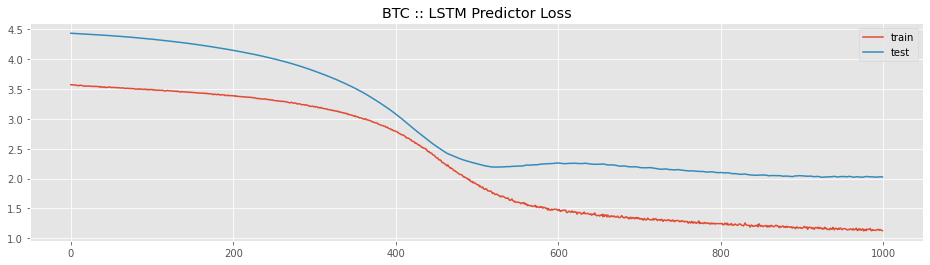

In [145]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16, 4)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title(f"{coin} :: LSTM Predictor Loss")
plt.savefig(f"plots/{EXPERIMENT_ID}/losses.png", bbox_inches = "tight")
plt.show()

In [146]:
#prediction on training and testing data
train_predict = model.predict(X_train)    
test_predict = model.predict(X_test)       

inv_train_predict = np.concatenate((train_predict, X_train[:,-1,:]), axis=1)
inv_test_predict = np.concatenate((test_predict, X_test[:,-1,:]), axis=1)

In [147]:
y_test[timesteps-1:].shape

(155,)

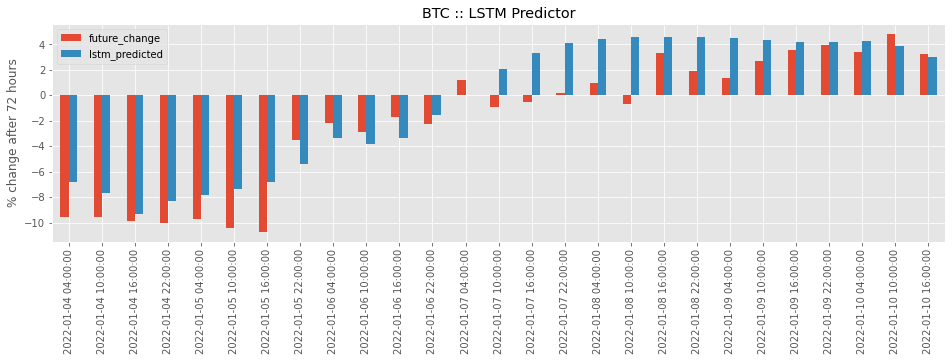

In [148]:
import pandas as pd
plt.rcParams["figure.figsize"] = (16, 4)

df = pd.DataFrame(y_test)

df['lstm_predicted'] = inv_test_predict[:,0]

ax = df[::6].plot.bar(title=f"{coin} :: LSTM Predictor")
ax.set_ylabel(f"% change after 72 hours")
plt.savefig(f"plots/{EXPERIMENT_ID}/predictor-test-bars.png", bbox_inches = "tight")
plt.show()

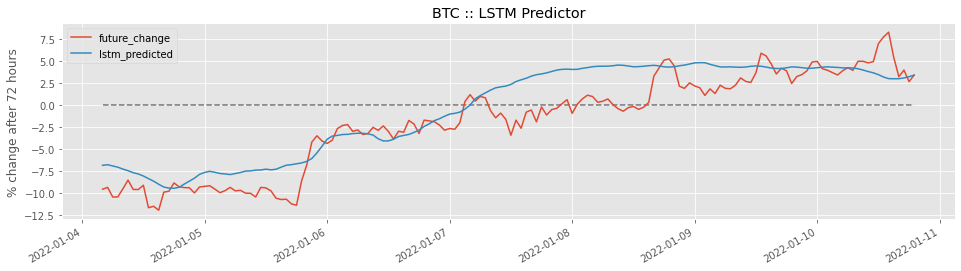

In [149]:
plt.rcParams["figure.figsize"] = (16, 4)

plt.plot(df.index, [0] * len(df), c='k', linestyle='--', alpha=0.5)
ax = df.plot(title=f"{coin} :: LSTM Predictor", ax=plt.gca())
ax.set_ylabel(f"% change after 72 hours")
plt.savefig(f"plots/{EXPERIMENT_ID}/predictor-test-line.png", bbox_inches = "tight")
plt.show()

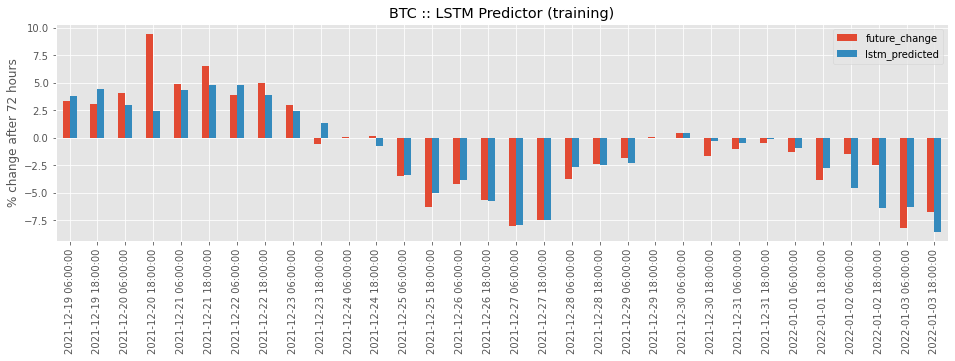

In [150]:
import pandas as pd

df = pd.DataFrame(y_train)

df['lstm_predicted'] = inv_train_predict[:,0]

ax = df[::12].plot.bar(title=f"{coin} :: LSTM Predictor (training)")
ax.set_ylabel(f"% change after 72 hours")
plt.savefig(f"plots/{EXPERIMENT_ID}/predictor-training-bars.png", bbox_inches = "tight")
plt.show()

In [151]:
from sklearn.feature_selection import f_regression, SelectKBest

X_train_orig = data['X_train'].to_numpy()
y_train_orig = data['y_train']

cols = ['sent/positive',
 'sent/negative',
 'sent/enthusiastic',
 'sent/confused',
 'sent/angry',
 'sent/sad',
 'sent/greedy',
 'sent/fearful',
 'sent/shocked',
 'sent/hopeful',
 'sent/indifferent',
 'sent/sarcastic',
 'tech/change',
 'tech/volume_osc_ma',
 'tech/trades_osc_ma',
 'techan/macd_norm',
 'techan/macd_histo_norm',
 'techan/rsi14',
 'techan/bollinger_low_score',
 'techan/bollinger_mid_score',
 'techan/bollinger_high_score',
 'google/trends',
 'twitter/count_osc_ma']

# configure to select all features
fs = SelectKBest(score_func=f_regression, k=10)
# learn relationship from training data
fs.fit(X_train_orig, y_train_orig)

# what are scores for the features
df_feat = pd.DataFrame(
    [{'feature': col, 'score': fs.scores_[i] / max(fs.scores_)} for i, col in enumerate(cols)]
).sort_values(by='score', ascending=False)

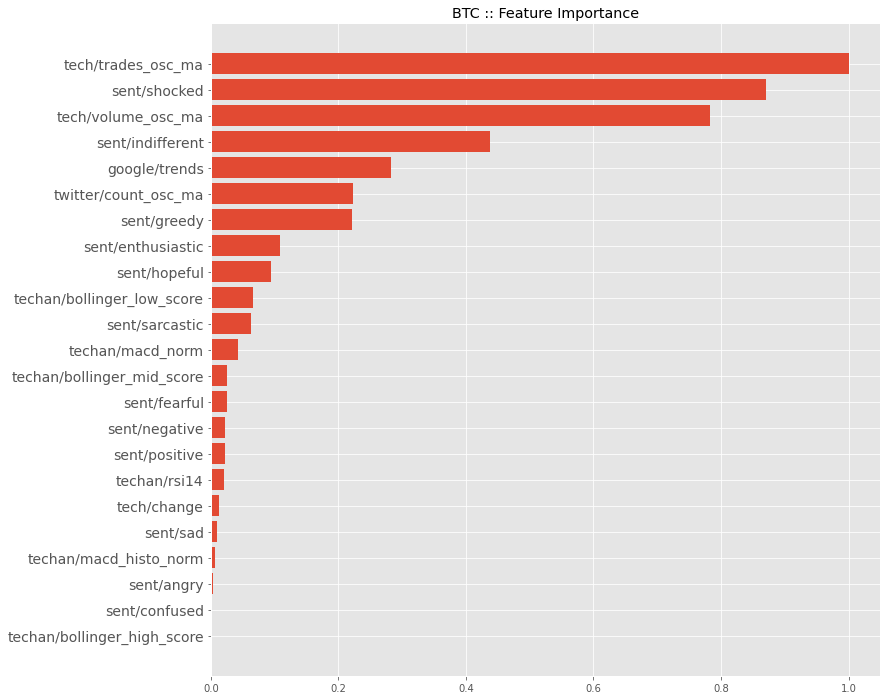

In [152]:
# plot the scores
plt.rcParams["figure.figsize"] = (12, 12)
plt.barh(df_feat['feature'], df_feat['score'])
plt.yticks(fontsize=14)
plt.gca().invert_yaxis()
plt.title(f"{coin} :: Feature Importance")
plt.savefig(f"plots/{EXPERIMENT_ID}/features.png", bbox_inches = "tight")
plt.show()

In [153]:
dir(model)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_los

In [154]:
# TODO: save network hyperparameters + input tensor timesteps